THE QUESTIONS WHICH ARE TO BE ANSWERED

### Constraints
 - Choose only between three locations -  Bangalore, Mumbai, and NCR. NCR include Gurgaon, Noida and New Delhi.

 - Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore",  "bangalore" is given. Take city name as "Bangalore". 

- For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

- There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

- Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding".

### Questions
##### Q1
Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. 
Plot the bar graph between location and number of funding. 
##### Q2 
Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.
##### Q3
After re-analyZing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finaliZing the previous list, you improvise it by finding the top 5 investors who have invested in different number of startups. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. 
##### Q4
Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. 
Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding.
##### Q5
Later in life your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

startups = pd.read_csv('startup_funding.csv')
df=startups.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


Bangalore 635


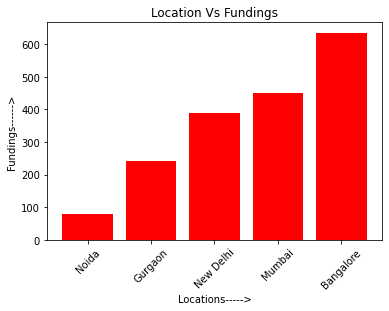

In [2]:
#Q1
# Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. 
# Plot the bar graph between location and number of funding. 
# Choose only between three locations -  Bangalore, Mumbai, and NCR. NCR include Gurgaon, Noida and New Delhi.
from turtle import color
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

startups = pd.read_csv('startup_funding.csv')
df=startups.copy()
df.head()
df.drop(df.index[df.CityLocation.isnull()], inplace=True)
df.loc[df['CityLocation']=='bangalore','CityLocation'] = 'Bangalore'
df.loc[df['CityLocation']=='Delhi','CityLocation'] = 'New Delhi'

city = []
for i in df.CityLocation:
    city.append(i)

for i in range(len(city)):
    city[i]=city[i].split('/')[0].strip()

np_city = np.array(city)


city_fundings ={}
for i in range(len(np_city)):
    if ((np_city[i] == 'Bangalore') | (np_city[i] == 'Mumbai') | (np_city[i] == 'Gurgaon') | (np_city[i] == 'New Delhi') | (np_city[i] == 'Noida')):
        city_fundings[np_city[i]]=city_fundings.get(np_city[i],0)+1

city_fundings

xaxis = list(city_fundings.keys())
yaxis = list(city_fundings.values())

np_xaxis = np.array(xaxis)
np_yaxis = np.array(yaxis)


np_xaxis = np_xaxis[np.argsort(np_yaxis)]
np_yaxis = np.sort(np_yaxis)

most_funded_city = np_xaxis[::-1][0]
most_funded_city_value = np_yaxis[::-1][0]

print(most_funded_city,most_funded_city_value)

plt.bar(np_xaxis,np_yaxis,color='red')
plt.xlabel('Locations----->')
plt.ylabel('Fundings------>')
plt.xticks(rotation=45)
plt.title('Location Vs Fundings')
plt.show()    

In [3]:
#Q2 
# Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). 
# In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

from turtle import color
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.head()
df.InvestorsName.isnull().value_counts() #to check null
df.drop(df.index[df['InvestorsName'].isnull()],inplace=True)
df.drop(df.index[df['InvestorsName']=='Undisclosed'],inplace=True)
df.drop(df.index[df['InvestorsName']=='undisclosed'],inplace=True)
df.InvestorsName.isnull().value_counts() #to check null

investors = {}
for i in df['InvestorsName']:
    x = i
    investors_x = x.split(',')

    # the below loop strips off the whitespaces
    for k in range(len(investors_x)):
        investors_x[k] = investors_x[k].strip()

    for j in investors_x:
        investors[j] = investors.get(j,0)+1
investors #to check if what I was doing is right
investor = list(investors.keys())
opportunities = list(investors.values())

np_investor = np.array(investor)
np_opportunities = np.array(opportunities)

np_investor = np_investor[np.argsort(np_opportunities)]
np_opportunities = np.sort(np_opportunities)

np_investor = np_investor[len(np_investor)-1:len(np_investor)-1-5:-1]
np_opportunities = np_opportunities[len(np_opportunities)-1:len(np_opportunities)-1-5:-1]

for i in range(len(np_investor)):
    print(np_investor[i],np_opportunities[i])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [ ]:
#Q3
# After re-analyZing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. 
# So before finaliZing the previous list, you improvise it by finding the top 5 investors who have invested in DIFFERENT and NOT SAME number of startups. 
# Find the top 5 investors who have invested maximum number of times in different companies.
# That means, if one investor has invested multiple times in one startup, count one for that company. 

import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'UTF-8')
df = dataset.copy() # Just a another dataframe to so that we can get back our original dataframe if required
df.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)
df.StartupName.replace('Olacabs', 'Ola Cabs',inplace = True)
df.StartupName.replace('OYO Rooms', 'Oyo', inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
df.StartupName.replace('Oyorooms', 'Oyo', inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)
# Function f() is used to sort the list on the basis of frequency rather than string
def f(x):
    return x[1]

investors = np.array(df.InvestorsName) 
companies = np.array(df.StartupName) 
inc = {}
for i in range(len(investors)):
    names1 = str(investors[i]).split(', ')
    for j in range(len(names1)):
        names2 = names1[j].split(' and ')
        for k in range(len(names2)):
            names3 = names2[k].split(',')
            for n in names3:
                # As told above we need to ignore Undisclosed Investor or string is empty
                if n == ' ' or n == '' or n == 'Undisclosed Investors' or n == 'Undisclosed investors':
                    continue
                if n not in inc:
                    inc[n] = [companies[i]]
                else:
                    inc[n].append(companies[i])
inf = []
for i in inc: #this corresponds to the keys.
    inf.append([i, len(set(inc[i]))])
# Sort() function used to sort the invfreq list into descending order using reverse = True
# and key is set to function f which returns frequency of each investor so that
# it can be sorted as per frequency rather than string.

inf

#the f function sorts on the basis of key. And here f stores a value in 'k'
#on the basis of which, the list is to be sorted
inf.sort(key = f, reverse = True)

# Storing top 5 investors and their frequency
comp = []
inv = []
for i in range(5):
    comp.append(inf[i][0])
    inv.append(inf[i][1])

for i in range(len(comp)):
    print(comp[i],inv[i])

c = ['red','green','blue','pink','brown'] # List of the colors for the bars
plt.bar(comp, inv, edgecolor = 'black', color = c, alpha = 0.7)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0,55)

plt.xlabel('<--- Investors --->', fontsize = 17)
plt.ylabel('<-- No of Companies -->', fontsize = 17)
plt.title('Top 5 Investors 2015-2017 who invested in Different Companies', fontsize = 20)
plt.show()


Indian Angel Network 33
Rajan Anandan 22
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


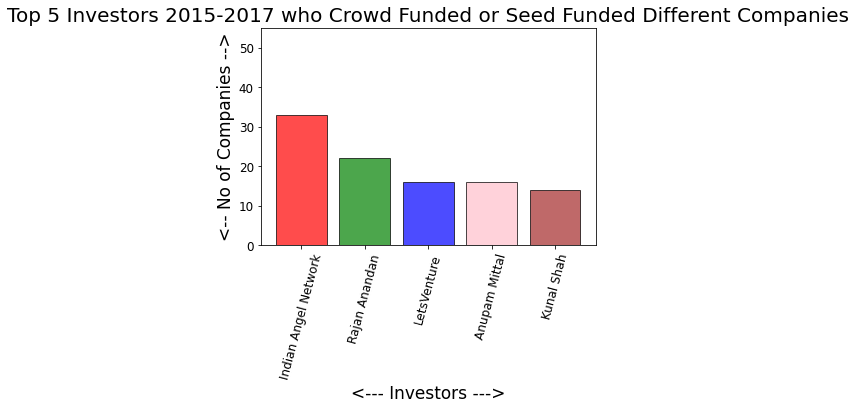

In [21]:
## Q4
# Since your friend startup is at an early stage startup, the best-suited investment 
# type would be - Seed Funding and Crowdfunding. 
# Find the top 5 investors who have invested in a different number of startups and their 
# investment type is Crowdfunding or Seed Funding.

# Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
# Keep an eye for any spelling mistake. You can find this by printing unique values from this column. 
# There are many errors in startup names. 
# Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'UTF-8')
df = dataset.copy() # Just a another dataframe to so that we can get back our original dataframe if required
df.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)
df.StartupName.replace('Olacabs', 'Ola Cabs',inplace = True)
df.StartupName.replace('OYO Rooms', 'Oyo', inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
df.StartupName.replace('Oyorooms', 'Oyo', inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)

df.InvestmentType.unique()
df.drop(df.index[df.InvestmentType.isnull()],inplace=True)
df.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
df.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)
df.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
df.InvestmentType.unique()

df.drop(df.index[(df.InvestmentType == 'Private Equity') | (df.InvestmentType == 'Debt Funding')],inplace=True)

df.InvestmentType.unique()

def f(x):
    return x[1]

investors = np.array(df.InvestorsName) 
companies = np.array(df.StartupName) 
inc = {}
for i in range(len(investors)):
    names1 = str(investors[i]).split(', ')
    for j in range(len(names1)):
        names2 = names1[j].split(' and ')
        for k in range(len(names2)):
            names3 = names2[k].split(',')
            for n in names3:
                # As told above we need to ignore Undisclosed Investor or string is empty
                if n == ' ' or n == '' or n == 'Undisclosed Investors' or n == 'Undisclosed investors':
                    continue
                if n not in inc:
                    inc[n] = [companies[i]]
                else:
                    inc[n].append(companies[i])
inf = []
for i in inc: #this corresponds to the keys.
    inf.append([i, len(set(inc[i]))])
# Sort() function used to sort the investment freq list into descending order using reverse = True
# and key is set to function f which returns frequency of each investor so that
# it can be sorted as per frequency rather than string.

inf

#the f function sorts on the basis of key. And here f stores a value in 'k'
#on the basis of which, the list is to be sorted
inf.sort(key = f, reverse = True)

# Storing top 5 investors and their frequency
comp = []
inv = []
for i in range(5):
    comp.append(inf[i][0])
    inv.append(inf[i][1])

for i in range(len(comp)):
    print(comp[i],inv[i])

c = ['red','green','blue','pink','brown'] # List of the colors for the bars
plt.bar(comp, inv, edgecolor = 'black', color = c, alpha = 0.7)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0,55)

plt.xlabel('<--- Investors --->', fontsize = 17)
plt.ylabel('<-- No of Companies -->', fontsize = 17)
plt.title('Top 5 Investors 2015-2017 who Crowd Funded or Seed Funded Different Companies', fontsize = 20)
plt.show()



Sequoia Capital 45
Accel Partners 44
Kalaari Capital 37
Blume Ventures 27
SAIF Partners 24


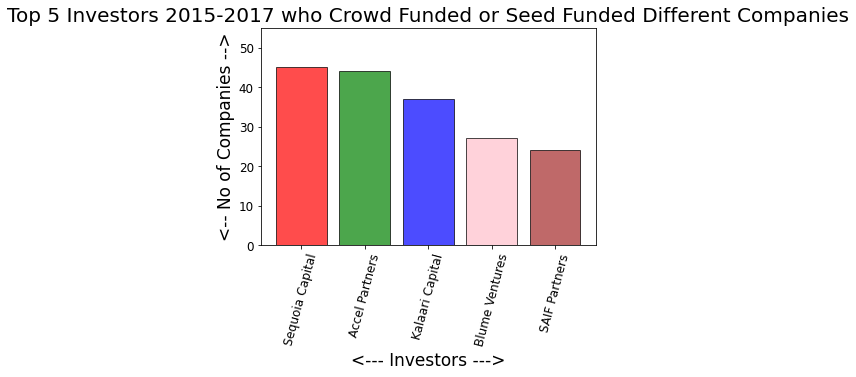

In [25]:
## Q5
# Find the top 5 investors who have invested in a different number of startups and their 
# investment type is Crowdfunding or Seed Funding.

# Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
# Keep an eye for any spelling mistake. You can find this by printing unique values from this column. 
# There are many errors in startup names. 
# Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

## Q4
# Since your friend startup is at an early stage startup, the best-suited investment 
# type would be - Seed Funding and Crowdfunding. 
# Find the top 5 investors who have invested in a different number of startups and their 
# investment type is Crowdfunding or Seed Funding.

# Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
# Keep an eye for any spelling mistake. You can find this by printing unique values from this column. 
# There are many errors in startup names. 
# Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'UTF-8')
df = dataset.copy() # Just a another dataframe to so that we can get back our original dataframe if required
df.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)
df.StartupName.replace('Olacabs', 'Ola Cabs',inplace = True)
df.StartupName.replace('OYO Rooms', 'Oyo', inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
df.StartupName.replace('Oyorooms', 'Oyo', inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)

df.InvestmentType.unique()
df.drop(df.index[df.InvestmentType.isnull()],inplace=True)
df.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
df.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)
df.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
df.InvestmentType.unique()

df.drop(df.index[(df.InvestmentType == 'Debt Funding') | (df.InvestmentType == 'Crowd Funding') | (df.InvestmentType == 'Seed Funding')],inplace=True)

df.InvestmentType.unique()

def f(x):
    return x[1]

investors = np.array(df.InvestorsName) 
companies = np.array(df.StartupName) 
inc = {}
for i in range(len(investors)):
    names1 = str(investors[i]).split(', ')
    for j in range(len(names1)):
        names2 = names1[j].split(' and ')
        for k in range(len(names2)):
            names3 = names2[k].split(',')
            for n in names3:
                # As told above we need to ignore Undisclosed Investor or string is empty
                if n == ' ' or n == '' or n == 'Undisclosed Investors' or n == 'Undisclosed investors':
                    continue
                if n not in inc:
                    inc[n] = [companies[i]]
                else:
                    inc[n].append(companies[i])
inf = []
for i in inc: #this corresponds to the keys.
    inf.append([i, len(set(inc[i]))])
# Sort() function used to sort the investment freq list into descending order using reverse = True
# and key is set to function f which returns frequency of each investor so that
# it can be sorted as per frequency rather than string.

inf

#the f function sorts on the basis of key. And here f stores a value in 'k'
#on the basis of which, the list is to be sorted
inf.sort(key = f, reverse = True)

# Storing top 5 investors and their frequency
comp = []
inv = []
for i in range(5):
    comp.append(inf[i][0])
    inv.append(inf[i][1])

for i in range(len(comp)):
    print(comp[i],inv[i])

c = ['red','green','blue','pink','brown'] # List of the colors for the bars
plt.bar(comp, inv, edgecolor = 'black', color = c, alpha = 0.7)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0,55)

plt.xlabel('<--- Investors --->', fontsize = 17)
plt.ylabel('<-- No of Companies -->', fontsize = 17)
plt.title('Top 5 Investors 2015-2017 who Crowd Funded or Seed Funded Different Companies', fontsize = 20)
plt.show()


